#  Stochastic Volatility

https://en.wikipedia.org/wiki/Stochastic_volatility

[*********************100%***********************]  1 of 1 completed


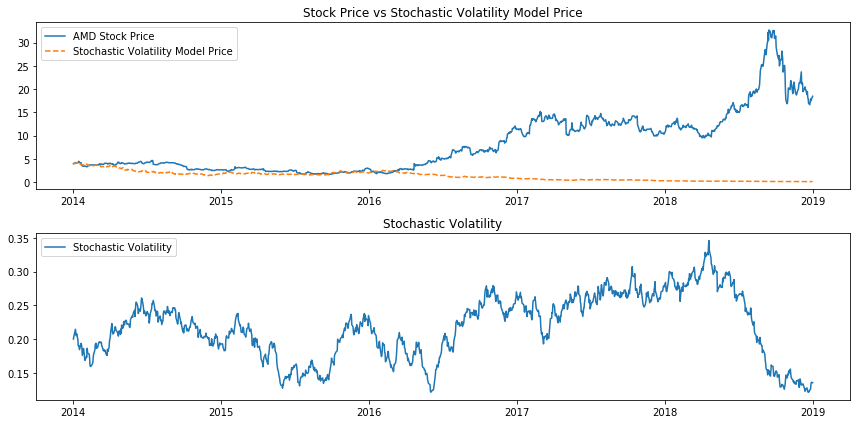

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Define a Stochastic Volatility function
def stochastic_volatility_model(data, lambda_, mu, sigma, dt):
    # Initialize arrays to store volatility and price values
    n = len(data)
    volatility = np.zeros(n)
    price = np.zeros(n)

    # Initialize the first value for price and volatility
    price[0] = data['Close'][0]
    volatility[0] = sigma

    # Simulate Stochastic Volatility
    for t in range(1, n):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process
        dZ = np.random.normal(0, np.sqrt(dt))  # Wiener process for volatility

        price[t] = price[t - 1] + lambda_ * (mu - price[t - 1]) * dt + np.sqrt(volatility[t - 1]) * price[t - 1] * dW
        volatility[t] = volatility[t - 1] + sigma * np.sqrt(volatility[t - 1]) * dZ

    return price, volatility

# Input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Define parameters for the Stochastic Volatility model
lambda_ = 0.2  # Speed of reversion
mu = 0.1       # Long-term mean
sigma = 0.2    # Volatility of volatility
dt = 1 / 252   # Daily time step (assuming 252 trading days in a year)

# Apply the Stochastic Volatility model
stock_price, stock_volatility = stochastic_volatility_model(dataset, lambda_, mu, sigma, dt)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(dataset.index, dataset['Close'], label='AMD Stock Price')
plt.plot(dataset.index, stock_price, label='Stochastic Volatility Model Price', linestyle='--')
plt.title('Stock Price vs Stochastic Volatility Model Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(dataset.index, stock_volatility, label='Stochastic Volatility')
plt.title('Stochastic Volatility')
plt.legend()

plt.tight_layout()
plt.show()